# **Lois s√©curitaires et criminalit√© en France**
---

<small>Par Arthur Bidel, William Olivier et Anh Linh Piketty</small>

<br>

## Introduction<a class="anchor" id="partie1"></a>

Le th√®me de l'ins√©curit√©, avec celui de l'ordre, occupent une place importante dans le d√©bat public et l'espace politique de ces derni√®res d√©cennies. Ancr√©e √† droite, la d√©nonciation d'une justice laxiste accompagne souvent la mise en exergue d'un "sentiment d'ins√©curit√©". Ce type de revendication repose sur plusieurs pr√©misses. D√©j√† de l'existence des ph√©nom√®nes d√©nonc√©s mais aussi d'un effet √† la baisse d'une l√©gislation plus stricte sur les ph√©nom√®nes d√©linquants. Dans quelle mesure ces postulats s'appuient sur un ancrage empirique concret ? 

Ce projet de programmation s'inscrit dans la continuit√© de ce d√©bat et tente (modestement) d'identifier l'effet de la production l√©gislative sur la criminalit√© et la d√©linquance en France. L'objet initial de notre curiosit√© √©tait de v√©rifier si un effet √† la baisse de la l√©gislation s√©curitaire sur les taux de criminalit√© et de d√©linquance  √©tait en effet constatable. Additionnellement, nous avons cherch√© √† dresser un portrait plus descriptif de l'√©volution de ces ph√©nom√®nes sur les 20 derni√®res ann√©es ainsi que de la l√©gislation associ√©e.

Les chiffres r√©pertoriant les nombres de crimes et d√©lit en France sont aujourd'hui disponible sur d'assez large et p√©riode et permettent, bien qu'imparfaitement de documenter les diff√©rents aspects et √©volutions de la criminalit√© dans l'hexagone. De m√™me, la production l√©gislative est rendue disponible au public permettant de constater son √©volution quantitativement et qualitativement. Nous approchons les textes de lois sous un angle plut√¥t quantitatif ici ce qui ne permet pas de mesurer une augmentation de la s√©v√©rit√© des textes par exemple, des approches NLP pourrait √™tre int√©ressantes √† d√©velopper pour approfondir cet angle de recherche. 

*NB1 : Les fonctions de visualisation ont √©t√© d√©plac√©es dans un script python (***visualisation.py***) pour plus de lisibilit√©*<br>
*NB2 : Le travail de r√©cup√©ration et de mise en forme des donn√©es a √©t√© assez long pour les deux bases de donn√©es (sur les infractions et la l√©gislation) et deux autres notebooks leur sont consacr√©s. Le sommaire cliquable renvoie vers ces notebooks pour chacune des parties correspondantes*

## Sommaire

* [Introduction](#partie1)
* [Installation](#partie2)
* [R√©cuparation et description des donn√©es](#partie3)
    * Base d√©linquance [(voir le notebook *database_d√©linquance*)](database_d√©linquance.ipynb)
    * Base l√©gifrance [(voir le notebook *database_l√©gifrance*)](database_l√©gifrance.ipynb)
* [Analyse exploratoire](#partie4)
    * [Portrait de la d√©linquance en France](#partie41)
        * [Description et visualisation](#partie411)
        * [Cartographie](#partie412)
    * [La l√©gislation s√©curitaire en France](#partie42)
        * [Statistiques descriptives](#partie421)
        * [Visualisation](#partie422)
* [Mod√©lisation](#partie5)
    * [Fusion des bases de donn√©es](#partie51)
    * [R√©gression de tel indicateur de criminalit√© sur la production l√©gislative](#partie52)
        * [Simple ?????]()
        * [Panel ?????]()
    * [D√©calage temporel ?????]()
* [Conclusion et perspectives](#partie6)

## Installation<a class="anchor" id="partie2"></a>

<span style="color:red;">**ici aussi avoir le pip requirement IMPORTANT et faire le pip requirement**</span>

In [3]:
#Code pour pip requirement faire le pip requirement

<span style="color:red;">**nettoyer dans les truc d'import, laisser que les trucs essentiels et en gros classifier quoi sert √† quoi**</span>

In [4]:
#Nettoyer ce truc et laisser les trucs essentiels

# Modules
import requests
import pandas as pd
import geopandas as gpd
import os
import zipfile
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
import s3fs

from scipy.signal import savgol_filter

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors
from IPython.display import Image, display

from shapely import wkt


# Fonctions et dictionnaires
from visualisation import charte_graphique
from visualisation import charte_graphique2
from visualisation import charte_graphique3
from visualisation import all

from visualisation import dictionnaire_geo
from visualisation import custom_greys_cmap
from visualisation import tracer_evolution_taux
from visualisation import tracer_evolution_taux_relatif_lisse
from visualisation import boxplot_indicateur_par_saison
from visualisation import √©volution_indicateur
from visualisation import evolution_indicateur_animation
from visualisation import animer_evolution_densite
from visualisation import evolution_idf_animation
from visualisation import get_increase
from visualisation import get_mean

from visualisation import tri_occurrence
from visualisation import plot_histogram
from visualisation import nb_lignes_traitant
from visualisation import filter_rows_with_keyword
from visualisation import count_crime_keywords
from visualisation import camembert

## R√©cuparation et description des donn√©es<a class="anchor" id="partie3"></a>

Les tableaux de donn√©es con√ßus au d√©but de notre travail, dans les deux notebooks consacr√©s, ont tous les deux √©t√© stock√©s sur S3 et on les r√©cup√®re pr√™ts √† l'usage dans cette partie. Les parties de r√©cup√©ration et nettoyage des donn√©es sont donc optionnelles √† la lecture mais offrent n√©anmoins des √©clairages m√©thodologiques quant √† la construction des indicateurs et des variables utilis√©es dans ce travail (lisez les svp...).

<span style="color:red;">**r√©gler le probl√®me de ce code marche pas**</span>

In [5]:
import s3fs

fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})

MY_BUCKET = "williamolivier"
fs.ls(MY_BUCKET)

['williamolivier/diffusion']

* #### Tableaux de donn√©es concernant la criminalit√© : 

In [6]:
MY_BUCKET = "williamolivier"
FILE_PATH_S3 = f"{MY_BUCKET}/diffusion/df_indicateurs_dep.csv"

# Import
with fs.open(FILE_PATH_S3, "r") as file_in:
    df_indicateurs_dep = pd.read_csv(file_in)

# V√©rification
df_indicateurs_dep.head()

Unnamed: 0        Date D√©partement Indicateur  Nombre  Population  \
0           0  1996-01-01          01  Homicides     0.0      499310   
1           1  1996-01-01          02  Homicides     1.0      538017   
2           2  1996-01-01          03  Homicides     0.0      349376   
3           3  1996-01-01          04  Homicides     0.0      137453   
4           4  1996-01-01          05  Homicides     0.0      118526   

   Taux (/10 000)  Ann√©e  Mois          Nom D√©partement  Superficie (km2)  \
0        0.000000   1996     1                      Ain              5762   
1        0.018587   1996     1                    Aisne              7362   
2        0.000000   1996     1                   Allier              7340   
3        0.000000   1996     1  Alpes-de-Haute-Provence              6925   
4        0.000000   1996     1             Hautes-Alpes              5549   

     Densit√©  
0  86.655675  
1  73.080277  
2  47.598910  
3  19.848809  
4  21.359885

In [7]:
MY_BUCKET = "williamolivier"
FILE_PATH_S3 = f"{MY_BUCKET}/diffusion/df_indicateurs_nat.csv"

# Import
with fs.open(FILE_PATH_S3, "r") as file_in:
    df_indicateurs_nat = pd.read_csv(file_in)

# V√©rification
df_indicateurs_nat.head()

Unnamed: 0        Date          Zone                      Indicateur  \
0           0  1996-01-01  France_M√©tro  Coups et blessures volontaires   
1           1  1996-02-01  France_M√©tro  Coups et blessures volontaires   
2           2  1996-03-01  France_M√©tro  Coups et blessures volontaires   
3           3  1996-04-01  France_M√©tro  Coups et blessures volontaires   
4           4  1996-05-01  France_M√©tro  Coups et blessures volontaires   

   Nombre  Population  Taux (/10 000)  Ann√©e  Mois     Saison  Taux relatif  \
0  5616.0       57936        0.969345   1996     1      Hiver      1.000000   
1  6115.0       57943        1.055347   1996     2      Hiver      1.088722   
2  6668.0       57951        1.150627   1996     3  Printemps      1.187015   
3  6800.0       57963        1.173162   1996     4  Printemps      1.210262   
4  7415.0       57976        1.278978   1996     5  Printemps      1.319424   

   Taux de pauvret√© (%)  
0                  19.3  
1                  19.3  
2                  19.3  
3                  19.3  
4                  19.3

Pour ce qui est de la d√©linquance, nous disposons de deux tableaux de donn√©es, un √† l'√©chelle d√©partementale et un √† l'√©chelle nationale. On trouve dans chacun d'entre eux huit indicateurs de criminalit√© et de d√©linquance construit selon la m√©thodologie actuelle du minist√®re de l'int√©rieur. Les huits indicateurs sont les : *homicides*, *tentatives d'homicides*, *coups et blessures volontaires*, *vols avec violence*, *vols sans violence*, *escroqueries*, *violences sexuelles* et *infractions li√©es √† la consommation ou la vente de stup√©fiants*.

Nous avons utilis√© les nombres brut d'infractions recens√©es par les forces de l'ordre, par types (107 diff√©rents), entre 1996 et 2022, mis √† disposition en open data par le minist√®re de l'int√©rieur ainsi que les estimations de population de l'INSEE pour obtenir les taux de d√©linquance (d√©finit comme le rapport du nombre de d√©lit/crime sur la population) associ√©s √† chacun des indicateurs.

Nous avons √©galement d√©j√† ajout√© √† ces bases les variables qui nous serviront de contr√¥le dans la partie mod√©lisation de ce travail. A savoir la densit√© pour la base d√©partementale et le taux de pauvret√© pour la base nationale. La densit√© sert ici de proxy √† la densit√© urbaine qui pourrait √† la fois √™tre un facteur criminog√®ne et un handicap pour le maintien de l'ordre. Elle a √©t√© d√©termin√©e gr√¢ce aux estimations de population d√©j√† mentionn√©es et aux superficie des d√©partements scrap√©es de Wikip√©dia. Le taux de pauvret√© a √©t√© obtenue via l'INSEE mais malheureusement nous n'avons pas trouv√© de donn√©es √† l'√©chelle d√©partementale pour toutes les ann√©es couvertes par nos bases.

La plupart de nos sources comportaient des donn√©es manquantes pour les territoires d'Outre-Mer et nous avons donc d√©cid√© de centrer notre travail sur la France m√©tropolitaine. De m√™me il n'√©tait pas possible d'obtenir des donn√©es √† granularit√© mensuelle pour les donn√©es d√©partementales et on s'est donc satisfait d'une granularit√© annuelle. 

Vous pouvez trouvez plus de pr√©cision sur la construction de ces tables dans le notebook consacr√© ([juste l√† !](database_d√©linquance.ipynb)).

* #### Tableaux de donn√©es concernant la production l√©gislative : 

In [8]:
MY_BUCKET = "williamolivier"
FILE_PATH_S3 = f"{MY_BUCKET}/diffusion/df_loda.csv"

# Import
with fs.open(FILE_PATH_S3, "r") as file_in:
    df_loda = pd.read_csv(file_in)

# V√©rification
df_loda.head()

Unnamed: 0                                              Titre  \
0           0  Arr√™t√© du 31 ao√ªt 2022 fixant les niveaux de p...   
1           1  Arr√™t√© du 30 ao√ªt 2022 portant cr√©ation de la ...   
2           2  Arr√™t√© du 30 ao√ªt 2022 portant cr√©ation de la ...   
3           3  Arr√™t√© du 29 ao√ªt 2022 portant cr√©ation de la ...   
4           4  Arr√™t√© du 22 ao√ªt 2022 fixant la liste des pos...   

                                ID                       Date  Nature  \
0  LEGITEXT000046244600_21-08-2023  2022-09-01 00:00:00+00:00  ARRETE   
1  LEGITEXT000046664861_28-08-2023  2022-12-02 00:00:00+00:00  ARRETE   
2  LEGITEXT000046664861_02-12-2022  2022-12-02 00:00:00+00:00  ARRETE   
3  LEGITEXT000046666903_02-12-2022  2022-12-02 00:00:00+00:00  ARRETE   
4  LEGITEXT000046230032_21-11-2022  2022-09-01 00:00:00+00:00  ARRETE   

      Etat Origine              Date Publication  Mois  Ann√©e  
0  VIGUEUR    LEGI  2022-09-01T00:00:00.000+0000     9   2022  
1  VIGUEUR    LEGI  2022-12-01T00:00:00.000+0000    12   2022  
2  VIGUEUR    LEGI  2022-12-01T00:00:00.000+0000    12   2022  
3  VIGUEUR    LEGI  2022-12-01T00:00:00.000+0000    12   2022  
4  VIGUEUR    LEGI  2022-08-31T00:00:00.000+0000     9   2022

En ce qui concerne la production l√©gislative, notre DataFrame principal recense le nombre de textes publi√©s chaque mois, class√©s par type (Lois, Arr√™t√©s, Ordonnances, D√©crets et D√©cisions) de 2006 √† 2022. Ces donn√©es proviennent du fonds LODA via l'API d√©livr√©e par L√©gifrance. 

Cependant, les donn√©es ne sont pas exhaustives (et par cons√©quent non repr√©sentatives de l‚Äôensemble de l‚Äôactivit√© l√©gislative) puisqu'elles ne refl√®tent pas les modifications l√©gislatives plus subtiles, telles que l‚Äôalourdissement des peines, la modification d‚Äôarticles existants ou l‚Äôajout de pr√©cisions juridiques (requalification d‚Äôune infraction mineure en d√©lit par exemple) qui peuvent avoir un impact significatif sans pour autant g√©n√©rer de nouveaux textes.

Ces donn√©es offrent, n√©anmoins, un aper√ßu des th√©matiques trait√©es depuis 2006, mettant en √©vidence la fr√©quence de publication des textes l√©gislatifs. Cette base de donn√©es nous donnent acc√®s au nombre d‚Äôoccurrences de chaque cat√©gorie de texte sans refl√©ter leur port√©e ou leur impact r√©el. Par exemple, une loi largement d√©battue appara√Æt de la m√™me mani√®re qu‚Äôun arr√™t√© technique de moindre envergure.

Cette absence de mesure du degr√© d‚Äôimportance ou des modifications souligne les limites de cette √©tude : l'analyse reste quantitative et des approches en NLP pourrait enrichir la d√©marche en permettant d'√©valuer la s√©v√©rit√© des textes adopt√©s par exemple. 

De m√™me vous pouvez, pour plus de d√©tails, consulter le notebook consacr√© ([ici](database_l√©gifrance.ipynb)).

## Analyse exploratoire<a class="anchor" id="partie4"></a>

### Portrait de la d√©linquance en France<a class="anchor" id="partie41"></a>

#### Description et visualisation<a class="anchor" id="partie411"></a>

Etudions d'abord l'√©volution de chacun de nos indicateurs sur la p√©riode de donn√©es disponible (1996 √† 2022).

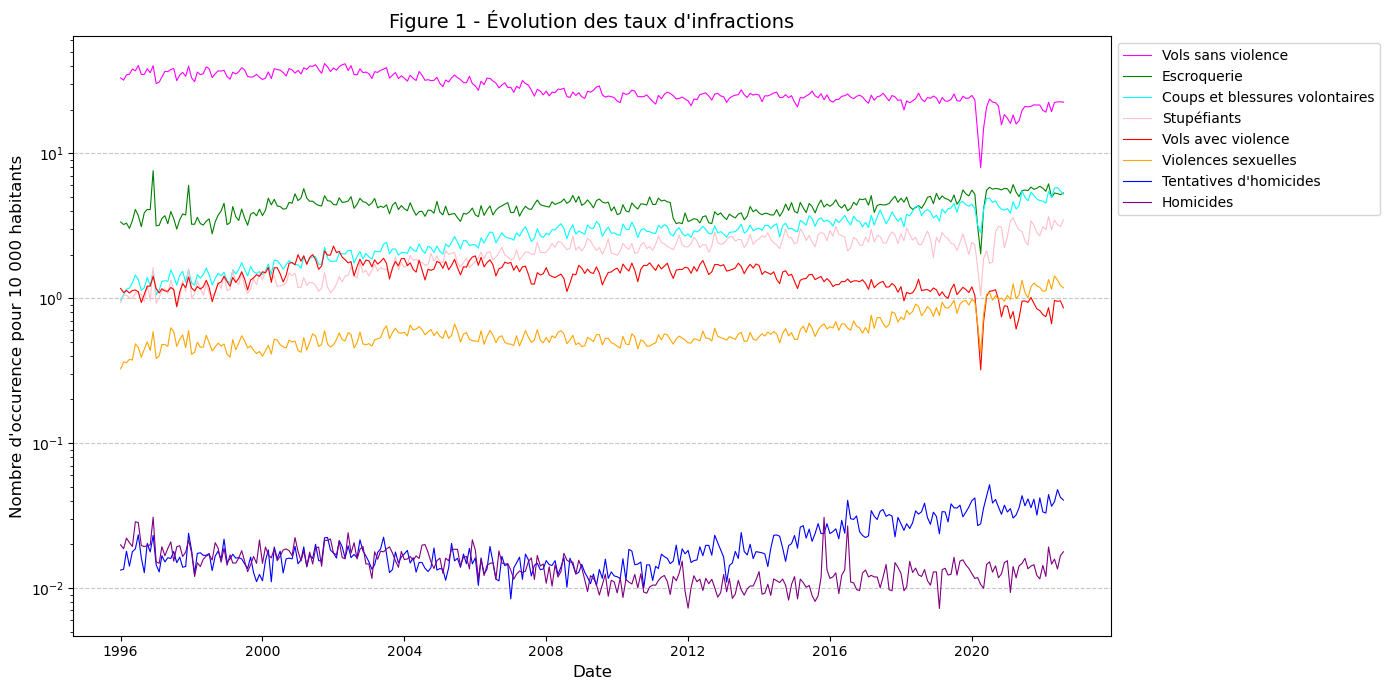

In [9]:
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, taux = "Taux (/10 000)", use_log_scale = True, title="Figure 1 - √âvolution des taux d'infractions")

M√™me si l'√©chelle logarithmique √©crase un peu les √©volutions de long terme, la Figure 1 permet d'illustrer les √©volutions des nombres d'infractions pour 10 000 habitants pour chacun de nos indicateurs. On remarque d'ores et d√©j√† des √©volutions contrast√©es. Certains types d'infractions sont plut√¥t √† la baisse (homicides, vols de tout types) quand d'autres augmentent (tentatives d'homicides, coups et blessures volontaires, escroqueries).

De mani√®re g√©n√©rale, les taux d‚Äôinfraction ne pr√©sentent pas de variations brutales au fil du temps : ils suivent une tendance relativement stable √† part les homicides et les tentatives d'homicides qui repartent √† la hausse depuis la derni√®res d√©cennies (m√™me si les homicides sont toujours moins fr√©quents en 2022 qu'en 1996).

En normalisant tous les taux √† leur valeur en 1996, les Figures 2 et 3 permettent de visualiser l‚Äô√©volution relative de chaque type d‚Äôinfraction par rapport √† cette ann√©e de r√©f√©rence. En particulier, la Figure 3 pr√©sente les courbes liss√©e des tendances gr√¢ce √† l‚Äôapplication d‚Äôun filtre de Savitzky-Golay. Ce filtre est con√ßu pour lisser les s√©ries temporelles en ajustant des polyn√¥mes locaux √† travers une fen√™tre glissante, ce qui permet d'√©liminer le "bruit" statistique.

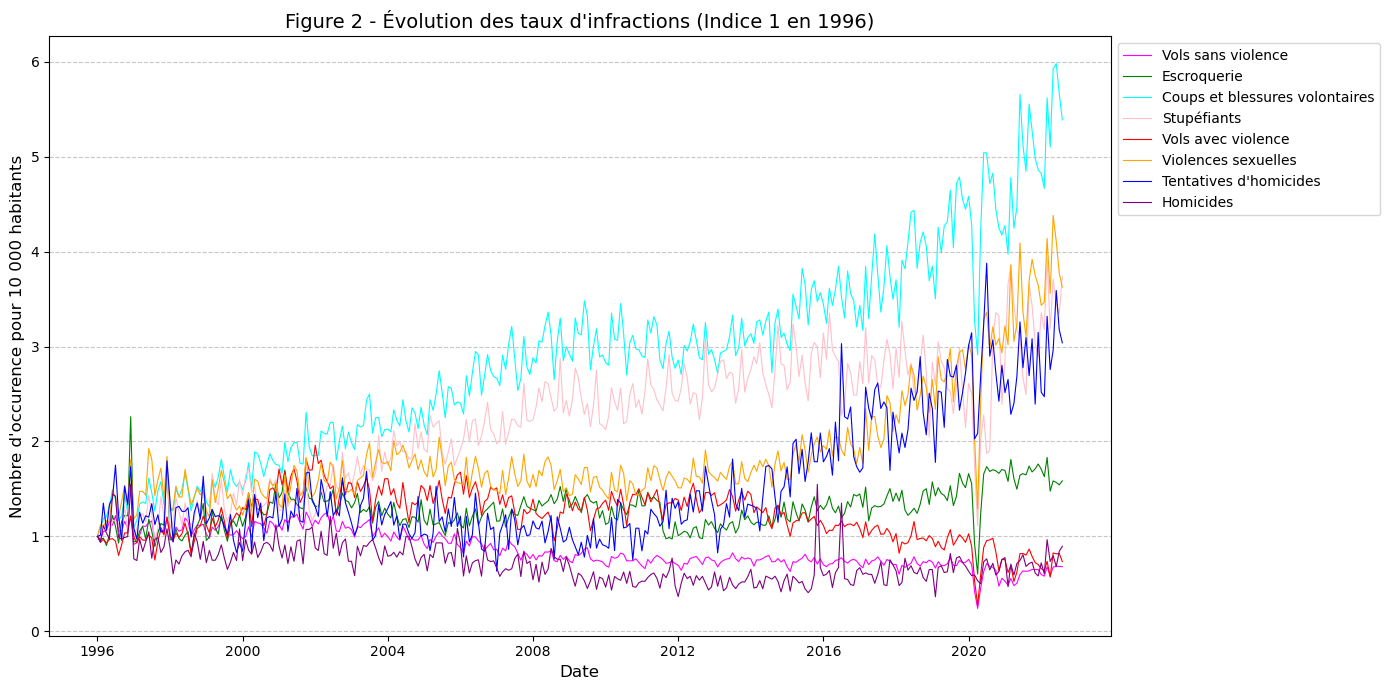

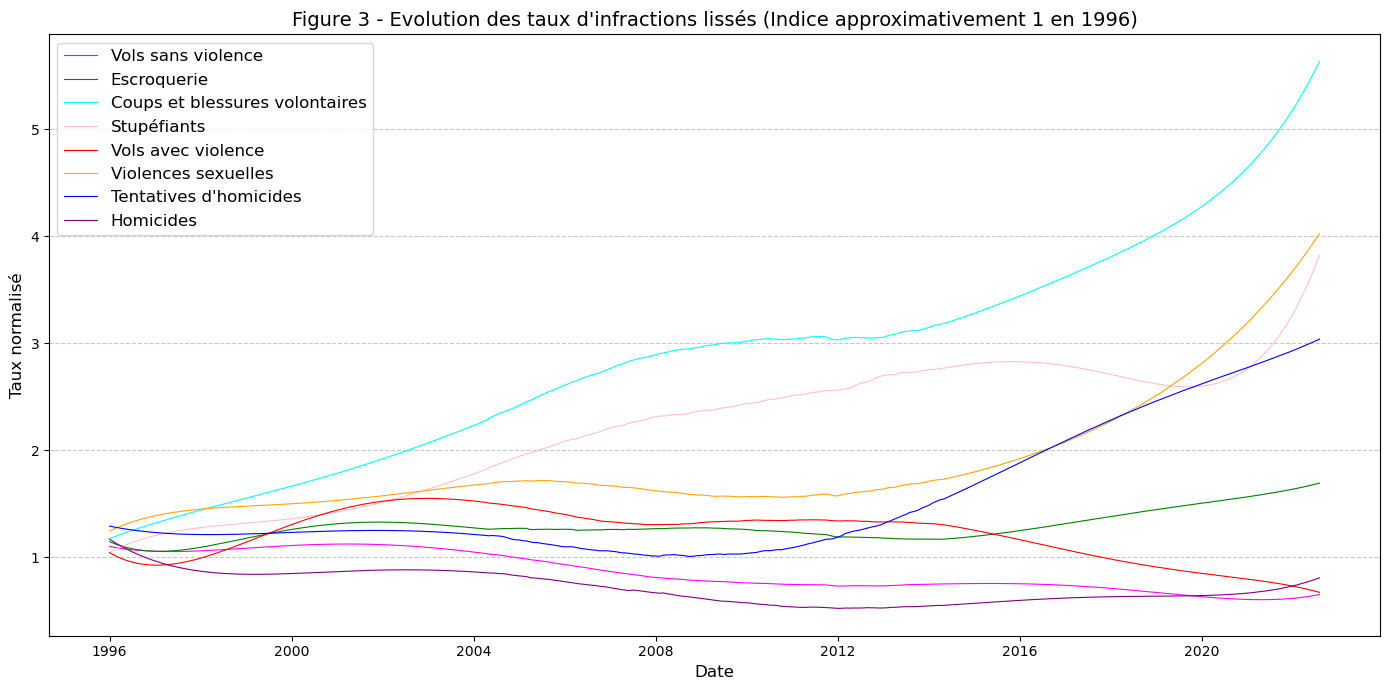

 Homicides entre 1996-01-01 et 2022-08-01: -10.47858905472778 %
 Tentatives d'homicides entre 1996-01-01 et 2022-08-01: 203.96935961992378 %
 Vols avec violence entre 1996-01-01 et 2022-08-01: -26.53294218387946 %
 Vols sans violence entre 1996-01-01 et 2022-08-01: -31.904976615785706 %
 Escroquerie entre 1996-01-01 et 2022-08-01: 58.49635036177966 %
 Coups et blessures volontaires entre 1996-01-01 et 2022-08-01: 438.69498681855345 %
 Violences sexuelles entre 1996-01-01 et 2022-08-01: 262.6825902105622 %
 Stup√©fiants entre 1996-01-01 et 2022-08-01: 273.78697439863015 %


In [10]:
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, taux = "Taux relatif", title="Figure 2 - √âvolution des taux d'infractions (Indice 1 en 1996)")
tracer_evolution_taux_relatif_lisse(df_indicateurs_nat, charte_graphique, title="Figure 3 - Evolution des taux d'infractions liss√©s (Indice approximativement 1 en 1996)")

liste = ['Homicides', "Tentatives d'homicides", 'Vols avec violence', 'Vols sans violence', 'Escroquerie', 'Coups et blessures volontaires', 'Violences sexuelles', 'Stup√©fiants']
for indicateur in liste : 
    get_increase(df_indicateurs_nat, indicateur=indicateur, date1='1996-01-01', date2='2022-08-01')

In [11]:
get_increase(df_indicateurs_nat, indicateur='Violences sexuelles', date1='1996-01-01', date2='2007-01-01')
get_increase(df_indicateurs_nat, indicateur='Violences sexuelles', date1='2007-01-01', date2='2022-08-01')

 Violences sexuelles entre 1996-01-01 et 2007-01-01: 48.36255085018586 %
 Violences sexuelles entre 2007-01-01 et 2022-08-01: 144.45696581261487 %


A nouveau, on constate des tendances contrast√©es ce qui traduit une transformation des ph√©nom√®nes d√©linquants. Les menages seraient moins souvent confront√©s √† des vols de tout types mais plus souvent √† des escroqueries ce qui coincide avec les enqu√™tes de victimation. Plus g√©n√©ralement, les homicides et vols sont √† la baisse alors que le reste des indicateurs augmentent (plus ou moins). On constate par exemple que les coups et blessures volontaires ont plus que quadrupl√©es (augmentation de 438%). Les violences sexuelles augmentent elles-aussi significativement sur la p√©riode puisqu'elles font plus que doubler. Dans un contexte de lib√©ration de la parole et d‚Äôincitation √† d√©poser plainte, notamment √† travers l‚Äôam√©lioration (toute relative) des conditions d‚Äôaccueil des victimes, les personnes d√©clarent plus fr√©quemment avoir subi des violences sexuelles et d√©posent plus souvent plainte. Cette augmentation ne concorde en revanche pas avec les r√©sultats des enqu√™tes de victimation qui restent plut√¥t stable. Il est par ailleurs int√©ressant de constater que l'augmentation des violences sexuelles d√©clar√©es est beaucoup plus accrue dans la deuxi√®me moiti√© de la p√©riode (qui correspond √† la p√©riode d'existence du mouvement Me Too).

Enfin, la Figure 4, quant √† elle, zoome sur une p√©riode sp√©cifique : celle de la pand√©mie de COVID-19.

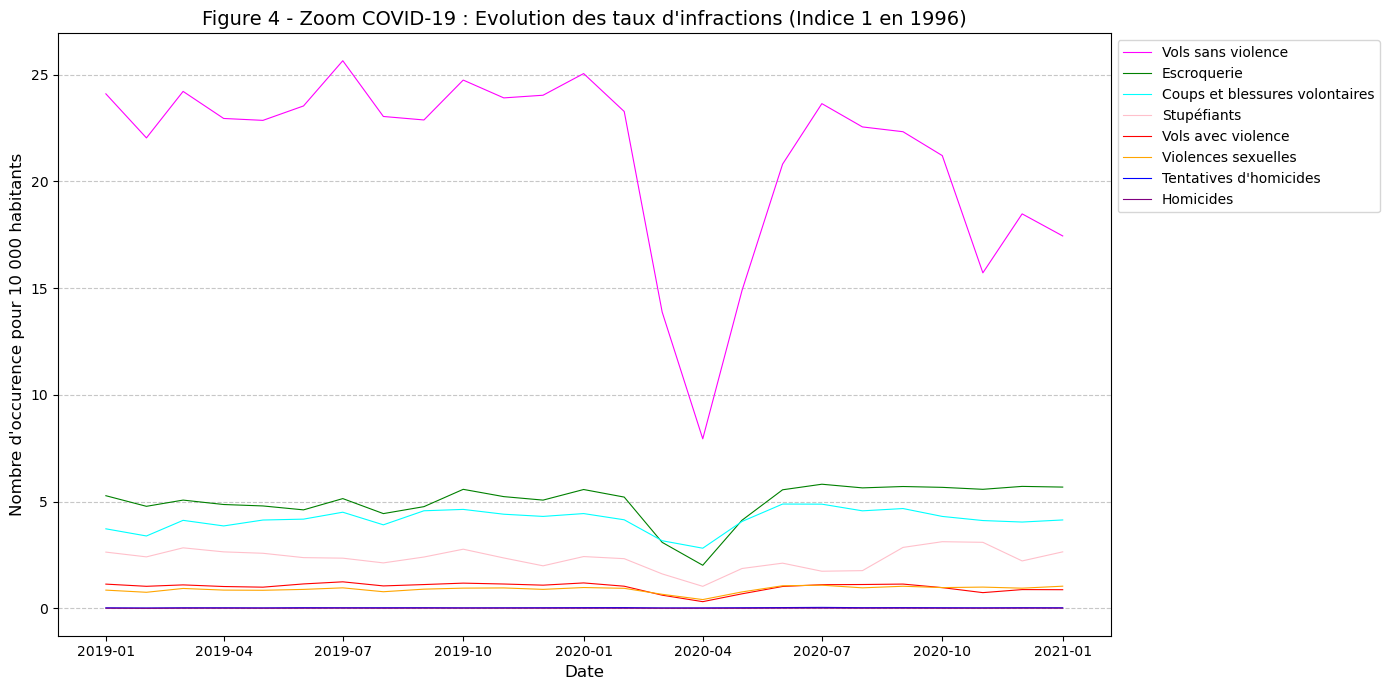

In [12]:
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, title="Figure 4 - Zoom COVID-19 : Evolution des taux d'infractions (Indice 1 en 1996)", use_log_scale=False, time_period=["2019-01-01", "2021-01-01"])

Cette p√©riode est marqu√©e par une chute significative de presque tous les indicateurs, avec un creux particuli√®rement notable en avril 2020, correspondant aux mesures de confinement les plus strictes. Seuls les homicides semblent relativement √©pargn√©es par cette baisse, ce qui pourrait s'expliquer par la nature moins opportuniste de ce type de crime (donc moins influenc√© par les restrictions de mobilit√©). L'activit√© criminelle a ainsi √©t√© largement perturb√©e par les restrictions de d√©placement, la fermeture des commerces, l'augmentation de la surveillance, etc.

D'autres tendance globale de l'activit√© criminelle se remarques dans nos donn√©es, notamment une certaine saisonnalit√©.

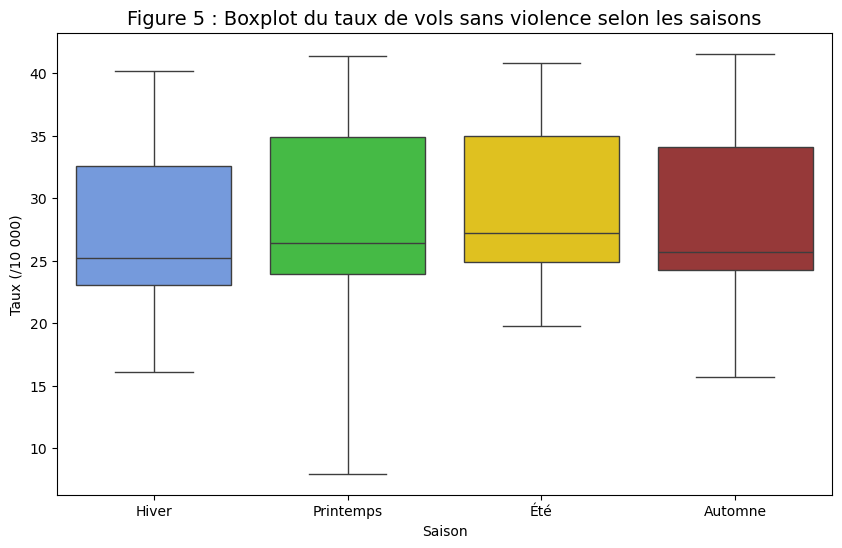

In [13]:
boxplot_indicateur_par_saison(df_indicateurs_nat, "Vols sans violence", title="Figure 5 : Boxplot du taux de vols sans violence selon les saisons")

La Figure 6 n'illustre que le cas des vols sans violences, mais en affichant les autres boxplot, une tendance g√©n√©rale √† un taux d'infractions plus √©lev√© en √©t√© appara√Æt pour tous les indicateurs.

#### Cartographie<a class="anchor" id="partie412"></a>

Pour finir, nous une repr√©sentation plus visuelle de ces √©volutions avec des cartes anim√©es. Il est int√©ressant de constater que si, pour certains indicateurs certaines concentrations g√©ographiques restent constantes autour du temps (autour de l'Ile de France et de la c√¥t√© d'Azur souvent), ces ph√©nom√®ne de concentratons n'existent pas pour les homicides ou les violences sexuelles qui semblent beaucoup plus uniform√©ment r√©partis sur le territoire.

*NB3 : On s'est rendu compte que les animations ne s'affichaient pas dans le notebook sur GitHub, elles sont donc sauvegard√©es dans le dossier ***animations*** pour √™tre visualis√©e au besoin.*

In [14]:
'''
for indicateur in liste :
    evolution_indicateur_animation(df_indicateurs_dep, indicateur, dictionnaire_geo)
'''    

'\nfor indicateur in liste :\n    evolution_indicateur_animation(df_indicateurs_dep, indicateur, dictionnaire_geo)\n'

En parall√®le de ces √©volutions assez substantielles de nos indicateurs de criminalit√©, on a cherch√© √† observer si la densit√© √©voluait particuli√®rement sur la p√©riode. En pratique l'√©chelle du d√©partement est probablement trop large pour rendre compte de ces √©volutions (les campagnes "noient" les √©volutions qui sont surtout urbaines). Concr√®tement, la carte anim√©e est plut√¥t tr√®s statique. Plus g√©n√©ralement, en consultant la litt√©rature associ√©e, il semble que l'inclusion de crit√®re g√©ographique dans l'√©tude de la criminalit√© pose souvent ce type de probl√®me puisque l'√©chelle d√©partementale est souvent inadapt√©e √† l'√©chelle √† laquelle ont √©tudie souvent les organisations spatiales.

In [15]:
'''
animer_evolution_densite(df=df_indicateurs_dep, colonne_densite='Densit√©', dictionnaire_geometrie=dictionnaire_geo)
'''

"\nanimer_evolution_densite(df=df_indicateurs_dep, colonne_densite='Densit√©', dictionnaire_geometrie=dictionnaire_geo)\n"

Si on est tr√®s attentif, on voit que l'essentiel des variations se fait au niveau de l'Ile de France, on a donc propos√© un zoom au niveau de cette zone g√©ographique, qui r√©sume en pratique quasi la totalit√© des variations de densit√© visible √† cette √©chelle.

In [16]:
'''
evolution_idf_animation(df_indicateurs_dep, 'Densit√©')
'''

"\nevolution_idf_animation(df_indicateurs_dep, 'Densit√©')\n"

### La l√©gislation s√©curitaire en France<a class="anchor" id="partie42"></a>

<span style="color:red;">**ECRIRE CETTE PARTIE**</span>

#### Statistiques descriptives<a class="anchor" id="partie421"></a>

#### Visualisation<a class="anchor" id="partie422"></a>

On cherche, pour cette base de donn√©es, √† observer quels sont les types de textes promulgu√©s, quels parts ils repr√©sentent, d'abord toutes ann√©es confondues (Figure 6) puis au cours du temps (Figure...)

(<Figure size 800x600 with 1 Axes>,
 <Axes: title={'center': 'Figure 6 - R√©partition globale des types de textes de loi (toutes ann√©es confondues)'}>)

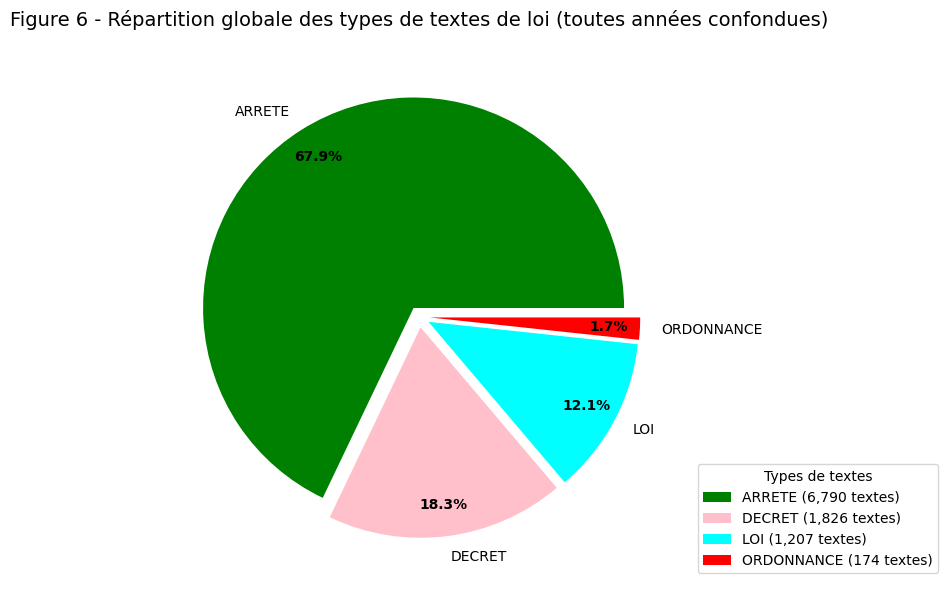

In [17]:
camembert(df_loda)

La base de donn√©es obtenue via l'API est √† l'√©tat brute, c'est-√†-dire que chaque ligne correspond √† une observation : chaque ligne repr√©sente, en effet, un texte individuel avec les informations sur sa publication.

Afin de produire une visualisation temporelle de ces donn√©es, nous avons r√©organiser ces donn√©es pour obtenir un tableau agr√©g√© qui montre, pour chaque mois, chaque ann√©e et chaque type de texte, le nombre de ce type texte de loi promulgu√©s en fonction de sa nature (loi, d√©cret, arr√™t√©, ordonnance). C'est le r√¥le de la fonction tri_occurrence, en agr√©geant les observations par mois et par nature. 

Les deux lignes de code ci-dessous permettent de mieux comprendre l'id√©e g√©n√©rale du tableau initial (df_loda) et celui du tableau obtenu gr√¢ce √† la fonction tri_occurrence appliqu√©e √† celui-l√†.

In [26]:
df_loda.sample()

Unnamed: 0                                              Titre  \
1692        1693  Arr√™t√© du 15 juillet 2019 modifiant l'arr√™t√© d...   

                                   ID                       Date  Nature  \
1692  LEGITEXT000038809431_25-07-2019  2019-07-25 00:00:00+00:00  ARRETE   

         Etat Origine              Date Publication  Mois  Ann√©e  
1692  VIGUEUR    LEGI  2019-07-24T00:00:00.000+0000     7   2019

In [27]:
tri_occurrence(df_loda).sample()

year  month  day       Date Indicateur  Nombre  Cumulatif
716  2018     11    1 2018-11-01        Loi     0.0      982.0

(<Figure size 1500x800 with 1 Axes>,
 <Axes: title={'center': 'Figure 8 - R√©partition des textes par type : Arrete, Loi, Decret, Ordonnance'}, xlabel='Date', ylabel='Nombre de textes'>)

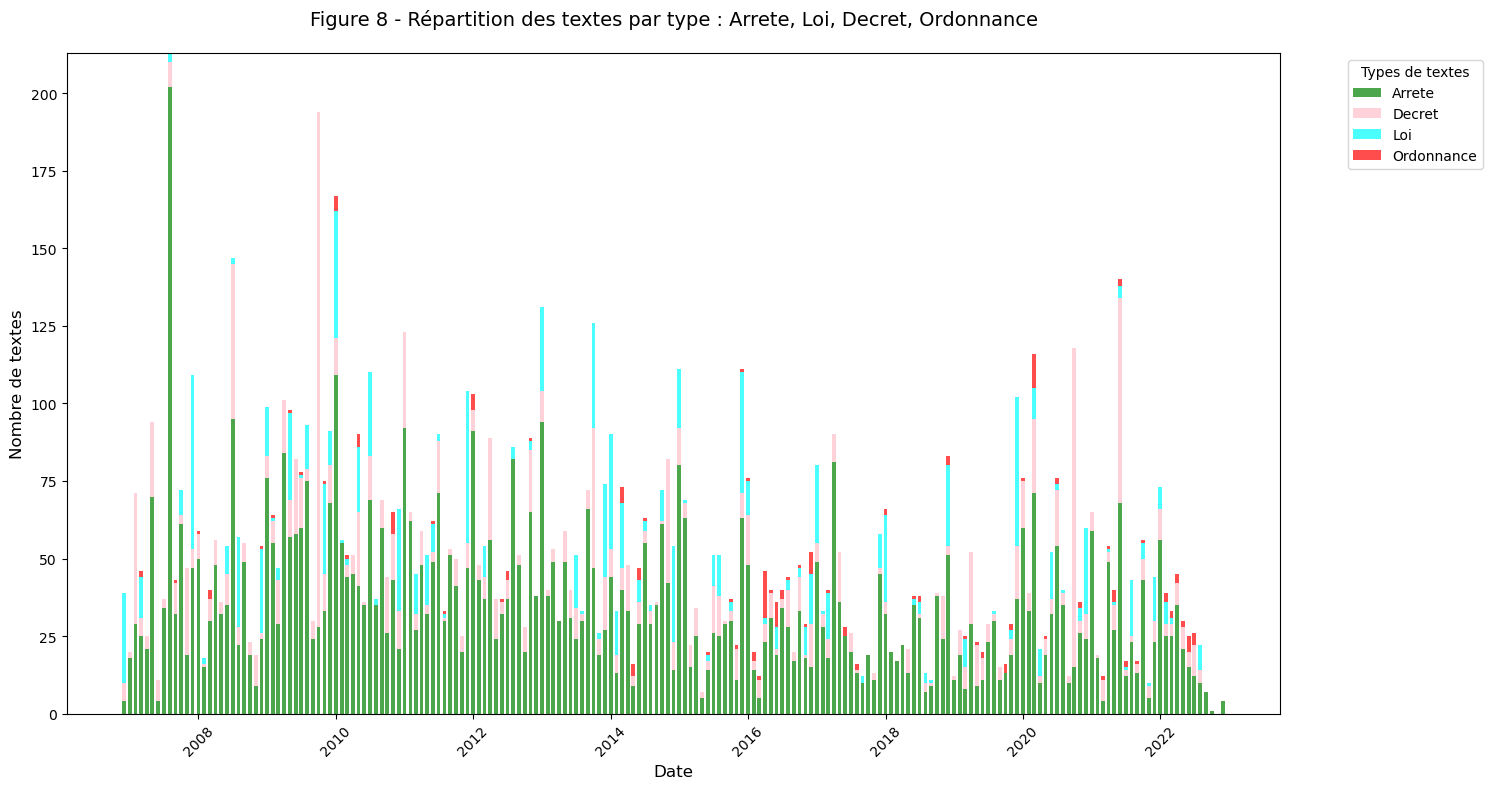

In [19]:
plot_histogram(tri_occurrence(df_loda), all, numero_figure= 'Figure 8 - ')

Ce diagramme en barre montre le nombre de textes l√©gislatifs publi√©s de 2006 √† 2022. Globalement, on observe une tendance √† la baisse progressive du nombre de publications au cours du temps. Les arr√™t√©s (barres vertes) sont la premi√®re cat√©gorie la plus fr√©quente et constituent la majeure partie de l'activit√© l√©gislative, en particulier avant 2016. Les lois (bleu clair), d√©crets (rose p√¢le) et ordonnances (rouge) sont beaucoup moins nombreux, mais r√©guliers et leur volume reste potentiellement significatif pour l'analyse. Les ordonnances (rouge) sont plus rares et leur r√©partition est in√©gale dans le temps avec une forte occurrence de publication √† partir de 2016.

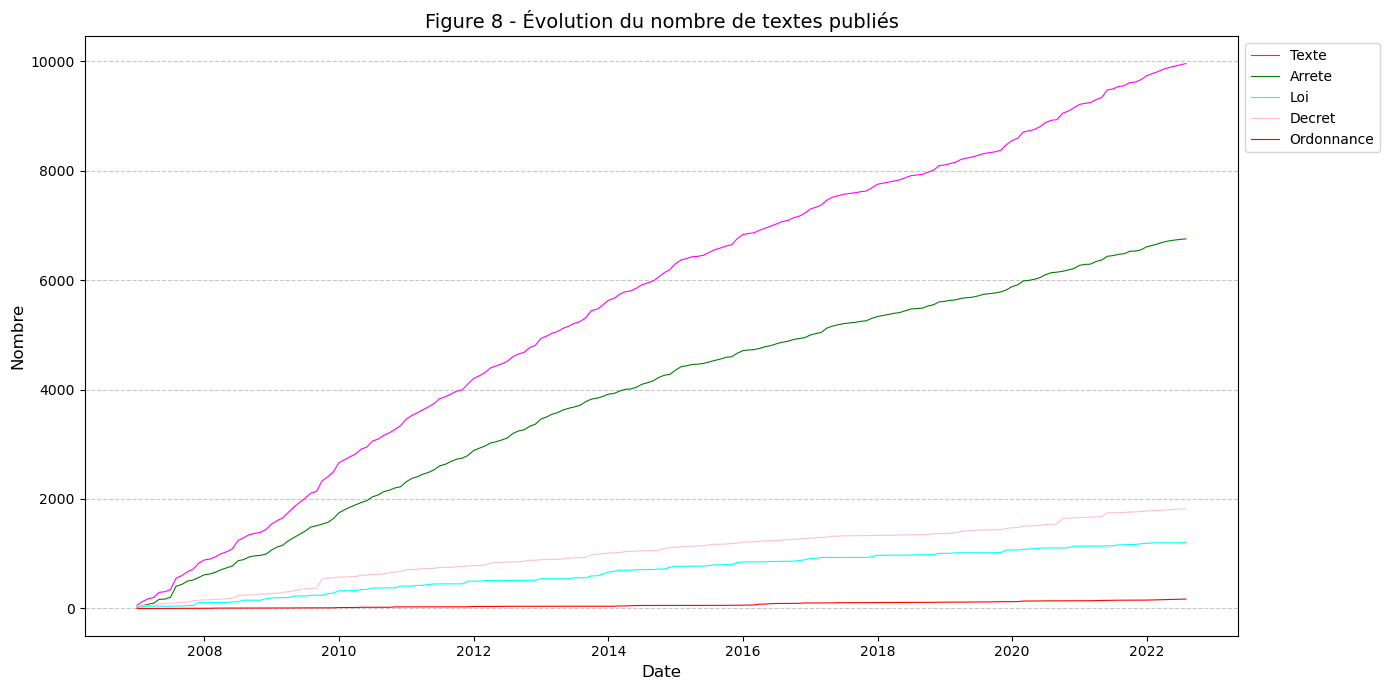

In [20]:
tracer_evolution_taux(tri_occurrence(df_loda), charte_graphique3,  taux = "Cumulatif", title="Figure 8 - √âvolution du nombre de textes publi√©s", xlabel = "Date",ylabel = "Nombre", time_period = ["2006-12-31", "2022-08-31"])

Cette figure pr√©sente l‚Äô√©volution cumul√©e des textes publi√©s au fil du temps et donc permet de visualiser plus clairement la croissance globale de la production l√©gislative depuis 2006. La courbe rose (Texte) montre une augmentation constante et r√©guli√®re, atteignant les 10 000 textes en 2022 dont les arr√™t√©s (vert) constituent plus de 6 000 publications. Les lois, d√©crets et ordonnances s‚Äôaccumulent plus lentement, avec une progression presque lin√©aire.

Nous allons maintenant concentrer notre analyse sur l'activit√© l√©gislative en lien avec les crimes et les infractions, en √©cartant les textes qui ne rel√®vent pas de ces th√©matiques. L'objectif est de cibler les mesures et d√©cisions ayant un impact sur la justice. Pour ce faire, nous allons rechercher des mots-cl√©s appartenant √† ce champ lexical dans les titres des publications, afin de les croiser ult√©rieurement avec nos donn√©es de criminalit√©.

In [21]:
mots_delit_frequents = count_crime_keywords(df_loda)
mots_delit_frequents = mots_delit_frequents[mots_delit_frequents['Fr√©quence']>0]
mots_delit_frequents

Fr√©quence
exploitation                 637
vol                          261
infraction                   141
fraude                        63
victime                       58
armes                         52
r√©pression                    51
menace                        47
crime                         38
trafic                        37
viol                          33
ex√©cution                     29
accident                      28
violence                      22
corruption                    14
d√©gradation                   14
tir                           13
dommages                      11
contravention                 11
peine                          9
contrefa√ßon                    5
r√©cidive                       4
d√©lit                          4
proc√®s-verbal                  4
escroquerie                    3
responsabilit√© p√©nale          3
garde √† vue                    3
fraude fiscale                 3
blanchiment                    3
harc√®lement                    2
g√©nocide                       2
condamnation                   1
outrage                        1
attentat                       1
otage                          1
maltraitance                   1

Les mots revenants le plus souvent sont ceux dont la fr√©quence (seuil choisit arbitrairement), est au dessus de 10.

(<Figure size 1500x800 with 1 Axes>,
 <Axes: title={'center': 'Figure -R√©partition des textes par type : Arrete, Loi, Decret, Ordonnance'}, xlabel='Date', ylabel='Nombre de textes'>)

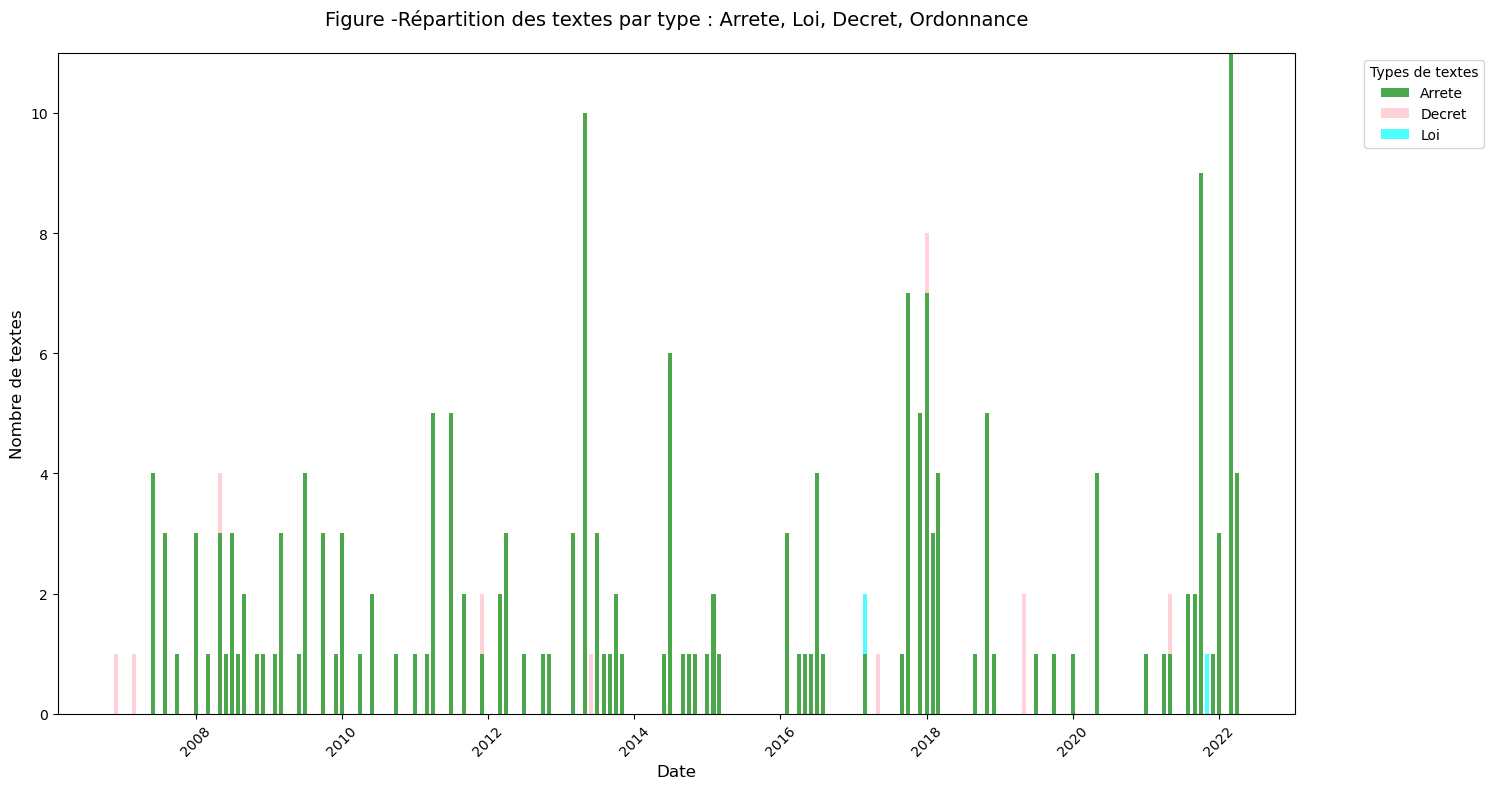

In [22]:
plot_histogram(tri_occurrence(filter_rows_with_keyword(df_loda, 'vol')), all)

In [23]:
tri_occurrence(df_loda)

year  month  day       Date  Indicateur  Nombre  Cumulatif
0    2006     12    1 2006-12-01       Texte    39.0       39.0
1    2006     12    1 2006-12-01      Decret     6.0        6.0
2    2006     12    1 2006-12-01      Arrete     4.0        4.0
3    2006     12    1 2006-12-01  Ordonnance     0.0        0.0
4    2006     12    1 2006-12-01         Loi    29.0       29.0
..    ...    ...  ...        ...         ...     ...        ...
955  2022     12    1 2022-12-01      Decret     0.0     1823.0
956  2022     12    1 2022-12-01      Arrete     4.0     6764.0
957  2022     12    1 2022-12-01       Texte     4.0     9966.0
958  2022     12    1 2022-12-01         Loi     0.0     1207.0
959  2022     12    1 2022-12-01  Ordonnance     0.0      172.0

[960 rows x 7 columns]

In [24]:
tri_occurrence(df_loda)[(tri_occurrence(df_loda)['Date'] >= '2006-01-01') & (tri_occurrence(df_loda)['Date'] <= '2022-12-31')]

year  month  day       Date  Indicateur  Nombre  Cumulatif
0    2006     12    1 2006-12-01       Texte    39.0       39.0
1    2006     12    1 2006-12-01      Decret     6.0        6.0
2    2006     12    1 2006-12-01      Arrete     4.0        4.0
3    2006     12    1 2006-12-01  Ordonnance     0.0        0.0
4    2006     12    1 2006-12-01         Loi    29.0       29.0
..    ...    ...  ...        ...         ...     ...        ...
955  2022     12    1 2022-12-01      Decret     0.0     1823.0
956  2022     12    1 2022-12-01      Arrete     4.0     6764.0
957  2022     12    1 2022-12-01       Texte     4.0     9966.0
958  2022     12    1 2022-12-01         Loi     0.0     1207.0
959  2022     12    1 2022-12-01  Ordonnance     0.0      172.0

[960 rows x 7 columns]

## Mod√©lisation<a class="anchor" id="partie5"></a>

Dans nos deux parties de statistiques descriptives, on a d√©gag√© des saisonnalit√© annuelle. Pour la mod√©lisation √©conom√©trique, on d√©cide d'indicer temporellement nos donn√©es par les ann√©es pour √©viter que ces probl√®mes de saisonnalit√© impacte trop l'ind√©pendance des diff√©rentes observations utilis√©es.

<span style="color:red;">**besoin de la base l√©gislative propre et en gros sa forme d√©finitive pour faire quelque chose**</span>

### Fusion des bases de donn√©es<a class="anchor" id="partie51"></a>

### R√©gression(s ?)<a class="anchor" id="partie51"></a>

<span style="color:red;">**la faire, here des indicatiosn tir√©es de chat et de vergara-merino**</span>


Explication de en gros ce que j'ai compris de chatgpt et vergara-merino

On peut faire une regr√©ssion de panel de la forme : <br>
$$
Y_{it} = \alpha + \beta \cdot L_t + \gamma \cdot G_{it}+ \mu _i + \epsilon _{it}
$$

o√π : <br>
$Y_{it}$ : Taux de criminalit√© (pour notre indicateur pr√©f√©r√© qu'on choisirat j'imagine) di d√©partement i √† l'ann√©e t<br>
$L_t$ : Mesure de l'intensit√© l√©gislative, comme on a pas les arr√™t√©s pr√©fectoraux sur l√©gifrance on est oblig√© d'en faire une variable constante pour tous les d√©partements i, elle est donc seulement indic√©e par t (les diff√©rences entre departement viennent donc des variables de contr√¥les √† priori)<br>
$G_{it}$ : Variable de contr√¥le : pour la table d√©partementale c'est la densit√© (en vrai l'√©chelle d√©partementale est pas hyper appropri√©e pour l'utiliser comme contr√¥l√© mais bon)<br>
$\mu _i$ : effet fixe aux d√©partements (pour diff√©rences structurelles non observ√©es)<br>
$\epsilon _{it}$ : error term<br>


Regression simple aussi : <br>
$$
Y_t = \alpha + \beta \cdot L_t + \gamma \cdot G_t + \epsilon _t
$$

o√π : <br>
$Y_t$ : Taux de criminalit√© (pour notre indicateur pr√©f√©r√© qu'on choisirat j'imagine)  √† l'ann√©e t<br>
$L_t$ : Mesure de l'intensit√© l√©gislative<br>
$G_t$ : Variable de contr√¥le : pour la table nationale, le taux de pauvret√©<br>
$\epsilon _t$ : error term<br>


Compl√©ment chatgpt sur les deux trucs, pas ex√©cuter ces lignes de code, lui demander pour further details

In [25]:
 Mise en Place du Code pour regression de panel:
Biblioth√®que Python : Utilise statsmodels ou linearmodels pour estimer les r√©gressions de panel.
Exemple de Code :

from linearmodels.panel import PanelOLS
import pandas as pd

# Chargement des donn√©es en format panel
data = pd.read_csv("data_panel.csv")  # Assure-toi que le dataset est au format long
data = data.set_index(['department', 'year'])

# Mod√®le √† Effets Fixes
model = PanelOLS.from_formula('Y ~ L + G + EntityEffects', data=data)
results = model.fit()
print(results.summary)


SyntaxError: invalid syntax (3827645754.py, line 1)

In [ ]:
Suggestions :
Inclure des retards l√©gislatifs : Les lois peuvent ne pas avoir d'effet imm√©diat. Tu pourrais tester des versions retard√©es de 
ùêøùë° (par exemple, ùêøùë°‚àí1,ùêøùë°‚àí2)

Validation des hypoth√®ses : V√©rifie que les r√©sidus ne sont pas autocorr√©l√©s (test de Durbin-Watson, etc.).

3. Mise en Place du Code :
Biblioth√®que Python : statsmodels pour les r√©gressions simples.
Exemple de Code :
python
Copier le code
import statsmodels.api as sm

# Pr√©parer les variables
X = df[['L', 'G']]  # Variables explicatives
X = sm.add_constant(X)  # Ajoute une constante pour l'intercept
Y = df['Y']  # Variable d√©pendante

# R√©gression simple
model = sm.OLS(Y, X)
results = model.fit()
print(results.summary())

## Conclusion et perspectives<a class="anchor" id="partie6"></a>

<br>
<br>

<span style="color:red;">**!!!**</span>

<br>

<span style="color:red;">**NORMALEMENT EN DESSOUS CEST DE LA REDITE ET CEST SUPPRIMABLE MAIS VERIFIER AVEC LES AUTRES**</span>


<span style="color:red;">**IL FAUT NETTOYER LE SCRIPT PYTHON DE VISUALISATION CAR IL EST IGNOBLE**</span>

<br>

<span style="color:red;">**!!!**</span>

In [ ]:
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, taux = "Taux (/10 000)", use_log_scale = True, title="Figure 1 - √âvolution des taux d'infractions")
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, taux = "Taux relatif", title="Figure 2 - √âvolution des taux d'infractions (Indice 1 en 1996)", use_log_scale = True, time_period=[])
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, taux = "Taux relatif", title="Figure 3 - √âvolution des taux d'infractions (Indice 1 en 1996)")
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, taux = "Taux relatif", title="Figure 4 - Zoom COVID-19 : Evolution des taux d'infractions (Indice 1 en 1996")
tracer_evolution_taux_relatif_lisse(df_indicateurs_nat, charte_graphique, title="Figure 5 - Evolution des taux d'infractions liss√©s (Indice approximativement 1 en 1996)")

La Figure 1 met en √©vidence que certaines infractions sont nettement moins fr√©quentes (comme les homicides et les tentatives d‚Äôhomicide) par rapport √† d'autres, bien plus r√©pandues (vols et escroqueries). De mani√®re g√©n√©rale, les taux d‚Äôinfraction ne pr√©sentent pas de variations brutales au fil du temps : ils suivent une tendance relativement stable. Toutefois, on per√ßoit une l√©g√®re hausse au cours de la derni√®re d√©cennie, notamment pour certaines cat√©gories comme les homicides, les tentatives d‚Äôhomicide, les coups et blessures volontaires ainsi que les escroqueries.

En normalisant tous les taux √† leur valeur en 1996, les Figures 2 et 3 permettent de visualiser l‚Äô√©volution relative de chaque type d‚Äôinfraction par rapport √† cette ann√©e de r√©f√©rence. Aujourd'hui, on constate clairement que les coups et blessures volontaires recens√©s ont quintupl√©. Viennent ensuite les violences sexuelles, les infractions li√©es aux stup√©fiants et les tentatives d‚Äôhomicide, qui ont tous plus que tripl√©.

La Figure 4, quant √† elle, zoome sur une p√©riode sp√©cifique : celle de la pand√©mie de COVID-19. Cette p√©riode est marqu√©e par une chute significative de presque tous les indicateurs, avec un creux particuli√®rement notable en avril 2020, correspondant aux mesures de confinement les plus strictes. Seuls les homicides semblent relativement √©pargn√©es par cette baisse, ce qui pourrait s'expliquer par la nature moins opportuniste de ce type de crime (donc moins influenc√© par les restrictions de mobilit√©). L'activit√© criminelle a ainsi √©t√© largement perturb√©e par les restrictions de d√©placement, la fermeture des commerces, l'augmentation de la surveillance, etc.

Enfin, la Figure 5 pr√©sente les courbes liss√©e des tendances gr√¢ce √† l‚Äôapplication d‚Äôun filtre de Savitzky-Golay. Ce filtre est con√ßu pour lisser les s√©ries temporelles en ajustant des polyn√¥mes locaux √† travers une fen√™tre glissante, ce qui permet d'√©liminer le "bruit" statistique.

In [ ]:
boxplot_indicateur_par_saison(df_indicateurs_nat, "Vols sans violence")
boxplot_indicateur_par_saison(df_indicateurs_nat, "Homicides")

<span style="color:red;">**d√©placer les fonctions de database_l√©gifrance dans le script et les importer ici pour la partie de stat desc**</span>

In [ ]:
√©volution_indicateur(df_indicateurs_dep, "Vols sans violence")

In [ ]:
print(df_indicateurs_dep['Ann√©e'].dtype)  # V√©rifier le type de donn√©es de la colonne Ann√©e
print(df_indicateurs_dep['Indicateur'].dtype)  # V√©rifier le type de donn√©es de la colonne Indicateur


        # V√©rification des lignes sans g√©om√©trie
        if df_filtre['geometry'].isna().any():
            print(f"Ann√©e {annee} : Certaines g√©om√©tries sont manquantes pour {indicateur}")
            print(df_filtre)

In [ ]:
evolution_indicateur_animation(df_indicateurs_dep, "Vols sans violence", dictionnaire_geo)
evolution_indicateur_animation(df_indicateurs_dep, "Coups et blessures volontaires", dictionnaire_geo)
evolution_indicateur_animation(df_indicateurs_dep, "Homicides", dictionnaire_geo)
ndicateur_animation(df_indicateurs_dep, "Stup√©fiants", dictionnaire_geo)

In [ ]:
from matplotlib.colors import LinearSegmentedColormap

# D√©finir une colormap personnalis√©e
def create_custom_greys_cmap():
    # Points de contr√¥le pour la colormap (0: blanc, 1: noir, ajust√©s pour nuances interm√©diaires)
    colors = [
        (0.95, 0.95, 0.95),  # Tr√®s clair
        (0.8, 0.8, 0.8),    # Clair
        (0.6, 0.6, 0.6),    # Interm√©diaire
        (0.4, 0.4, 0.4),    # Assez fonc√©
        (0.2, 0.2, 0.2)     # Fonc√© mais pas noir
    ]
    return LinearSegmentedColormap.from_list("CustomGreys", colors)

# Cr√©er la colormap
custom_greys_cmap = create_custom_greys_cmap()

In [ ]:
def animer_evolution_densite(df, colonne_densite, dictionnaire_geometrie):
    import os
    from IPython.display import display, Image
    from matplotlib import animation, colors
    import geopandas as gpd

    plt.ioff()
    
    # Pr√©parer la figure et l'axe
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Cr√©er une liste des ann√©es disponibles dans le DataFrame
    annees = sorted(df['Ann√©e'].unique())
    
    # Fonction d'initialisation pour l'animation
    def init():
        ax.clear()
        ax.set_title("Initialisation")
        ax.axis("off")
        return []
    
    # Fonction de mise √† jour pour chaque frame de l'animation
    def update(frame):
        ax.clear()
        annee = annees[frame]
        
        # Filtrer les donn√©es pour l'ann√©e en cours
        df_filtre = df[df['Ann√©e'] == annee].copy()
        
        # Ajouter les g√©om√©tries depuis le dictionnaire
        df_filtre['geometry'] = df_filtre['D√©partement'].map(dictionnaire_geometrie)
        
        # Cr√©er un GeoDataFrame √† partir du DataFrame filtr√©
        gdf = gpd.GeoDataFrame(df_filtre, geometry='geometry')
        
        # V√©rifier si le GeoDataFrame n'est pas vide
        if not gdf.empty:
            # Calculer les limites de couleur
            vmin = df[colonne_densite].min()
            vmax = df[colonne_densite].max()
            
            # Tracer la carte
            gdf.plot(column=colonne_densite, 
                     cmap=custom_greys_cmap,  # Colormap g√©n√©rique
                     ax=ax, 
                     legend=False,
                     vmin=vmin,
                     vmax=vmax,
                     edgecolor='0.8',
                     linewidth=0.5)
            
            # Titre de la carte
            ax.set_title(f"Densit√© de population - {annee}")
        else:
            print(f"Ann√©e {annee} : Aucune donn√©e disponible")
        
        ax.axis("off")
        ax.set_aspect(1.4)  # √âtirement vertical de la carte 
        
        return []
    
    # Cr√©er l'animation
    anim = animation.FuncAnimation(fig, 
                                   update, 
                                   init_func=init,
                                   frames=len(annees), 
                                   interval=500,  # 500 ms entre chaque frame
                                   blit=False)
    
    # Ajouter une barre de couleur
    vmin = df[colonne_densite].min()
    vmax = df[colonne_densite].max()
    sm = plt.cm.ScalarMappable(cmap=custom_greys_cmap, norm=colors.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.036, pad=0.1, label="Densit√© (hab/km¬≤)")
    
    # Sauvegarder l'animation au format GIF
    os.makedirs('animations', exist_ok=True)  # Cr√©e un dossier 'animations' s'il n'existe pas
    
    # Chemin de sauvegarde
    save_path = f'animations/evolution_densite.gif'
    
    # Sauvegarde en GIF
    anim.save(save_path, writer='pillow', fps=2)

    # Afficher l'animation
    display(Image(filename=save_path))
    
    print(f"Animation sauvegard√©e dans {save_path}")
    
    return anim

In [ ]:
animer_evolution_densite(
    df=df_indicateurs_dep, 
    colonne_densite='Densit√©', 
    dictionnaire_geometrie=dictionnaire_geo
)

Visualisation pas hyper concluante parce que bon d√©partement hors des grandes villes ont des densit√© assez similaires et assez faibles donc bon ronpiche, on verra comment adapter l'√©chelle de couleur

In [ ]:
def evolution_idf_animation(df, indicateur):
    import os
    from IPython.display import display, Image
    from matplotlib import animation, colors
    import geopandas as gpd
    import matplotlib.pyplot as plt
    
    plt.ioff()
    
    # Filtrer pour l'√éle-de-France (codes 75, 77, 78, 91, 92, 93, 94, 95)
    idf_codes = ['75', '77', '78', '91', '92', '93', '94', '95']
    df_idf = df[df['D√©partement'].isin(idf_codes)].copy()
    
    # Ajouter la g√©om√©trie √† partir du dictionnaire
    df_idf['geometry'] = df_idf['D√©partement'].map(dictionnaire_geo)

    nom_departement = {
        '75': 'Paris', '77': 'Seine-et-Marne', '78': 'Yvelines', '91': 'Essonne', 
        '92': 'Hauts-de-Seine', '93': 'Seine-Saint-Denis', '94': 'Val-de-Marne', '95': 'Val-d\'Oise'
    }
    df_idf['Nom_Departement'] = df_idf['D√©partement'].map(nom_departement)

    gdf_idf = gpd.GeoDataFrame(df_idf, geometry='geometry')
    
    # Cr√©er une liste des ann√©es
    annees = sorted(df_idf['Ann√©e'].unique())

    # D√©finir les limites des valeurs de densit√© pour la colorbar
    vmin = df_idf[indicateur].min()
    vmax = df_idf[indicateur].max()
    
    # Pr√©parer la figure et l'axe
    fig, ax = plt.subplots(figsize=(10, 8), dpi=200)

    # Configurer la colorbar une seule fois
    sm = plt.cm.ScalarMappable(cmap=custom_greys_cmap, norm=colors.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])  # N√©cessaire pour √©viter les erreurs avec colorbar
    cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', label=f"{indicateur}")
    
    # Fonction d'initialisation pour l'animation
    def init():
        ax.clear()
        ax.set_title("Initialisation")
        ax.axis("off")
        return []
    
    # Fonction de mise √† jour pour chaque frame de l'animation
    def update(frame):
        ax.clear()
        annee = annees[frame]
        
        # Filtrer les donn√©es pour l'ann√©e en cours
        gdf_frame = gdf_idf[gdf_idf['Ann√©e'] == annee]
        
        # D√©finir les limites des axes pour centrer sur l'√éle-de-France
        bounds = gdf_frame.total_bounds
        ax.set_xlim(bounds[0], bounds[2])
        ax.set_ylim(bounds[1], bounds[3])
        
        # Tracer la carte
        gdf_frame.plot(
            column=indicateur,
            cmap=custom_greys_cmap,  # Utilisez une cmap adapt√©e
            ax=ax,
            legend=False,
            edgecolor='0.8',
            linewidth=0.7
        )
        
        # Ajouter le titre de l'ann√©e
        ax.set_title(f"{indicateur} - {annee}", fontsize=14)
        ax.axis("off")
        ax.set_aspect(1.4)

        # Ajouter les noms des d√©partements
        for _, row in gdf_frame.iterrows():
            # R√©cup√©rer le centro√Øde du d√©partement
            centroid = row['geometry'].centroid
            # Ajouter le texte sans bo√Æte blanche, en gris fonc√© et avec une police plus fine
            ax.text(
                centroid.x, centroid.y, 
                row['Nom_Departement'], 
                ha='center', va='center', 
                fontsize=8, color='#666666', 
                fontweight='light',  
            )
        
        return []
    
    # Cr√©er l'animation
    anim = animation.FuncAnimation(
        fig,
        update,
        init_func=init,
        frames=len(annees),
        interval=500,
        blit=False
    )
    
    # Sauvegarder l'animation au format GIF
    os.makedirs('animations', exist_ok=True)
    save_path = 'animations/evolution_idf_densite.gif'
    anim.save(save_path, writer='pillow', fps=2)
    
    # Afficher l'animation
    display(Image(filename=save_path))
    print(f"Animation sauvegard√©e dans {save_path}")
    return anim


In [ ]:
evolution_idf_animation(df_indicateurs_dep, 'Densit√©')

In [ ]:
print("Cl√©s du dictionnaire :", list(dictionnaire_geo.keys()))
print("D√©partements uniques dans le DataFrame :", df_indicateurs_dep['D√©partement'].unique())


In [ ]:
df_indicateurs_dep['D√©partement'].dtype


In [ ]:
types_cles = {type(key) for key in dictionnaire_geo.keys()}
types_valeurs = {type(value) for value in dictionnaire_geo.values()}

print(f"Types des cl√©s : {types_cles}")
print(f"Types des valeurs : {types_valeurs}")

In [ ]:
evolution_indicateur_animation(df_indicateurs_dep, "Coups et blessures volontaires", dictionnaire_geo)
evolution_indicateur_animation(df_indicateurs_dep, "Homicides", dictionnaire_geo)
ndicateur_animation(df_indicateurs_dep, "Stup√©fiants", dictionnaire_geo)

In [ ]:
evolution_indicateur_animation(df_indicateurs_dep, "Homicides", dictionnaire_geo)
ndicateur_animation(df_indicateurs_dep, "Stup√©fiants", dictionnaire_geo)

In [ ]:
evolution_indicateur_animation(df_indicateurs_dep, "Stup√©fiants", dictionnaire_geo)